<a href="https://colab.research.google.com/github/sobandom/sobandom.github.io/blob/main/Convocatoria_GEA_IO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Minimizar** 3*x + 8*y

sujeto a:

x + y >= 50;
x - y <= 20;
x >= 0;
y >= 0.


Metodo simplex

**Primer paso:** Llevar a la forma estandarizada.

Al revisar, podemos ver que no cumple con la forma estandarizada por tener una restricción de tipo mayor o igual, y por ser un problema de minimizar.

1. restar una variable de exceso (G)
x + y - G = 50

2. Agregar una variable artificial (w)
x + y - G + W = 50

Asi tenemos:
min z = 3*x + 8*y + MW

sujeto a:

x + y - G + W = 50;
x - y <= 20;
x >= 0;
y >= 0.

3. para llevar el problema a maximizar, multiplicamos ambos lados de la función objetivo por -1.

Max -Z = -3*X - 8*Y - MW

-Z + 3*X + 8*Y + MW= 0

Y para poder introducirlo en el metodo simplex, es necesario eliminar la variable artificial de la función objetivo para que tenga coeficiente de 0.

-Z + 3*X + 8*Y +MW = 50 , le sumamos  la restricción donde sale W multiplicada por -M:

-z + (3-M)*X + (8-M)*Y + MG = -50M

4. Agregamos las variables de holgura para transformar las restricciones de <= en igualdades (K)

x + y - G + W = 50;
x - y + K = 20;
x >= 0;
G >=0;
k >=0;
w >=0;
y >= 0.


y asi tendriamos el problema aumentado

-z + (3-M)*X + (8-M)*Y + MG = -50M

sujeto a:

x + y - G + W = 50;
x - y + K = 20;
x >= 0;
G >=0;
k >=0;
w >=0;
y >= 0.

En este caso, nos saltaremos las interacciones por el metodo simplex tabular y utilizaremos dos solver:

Utilizando symbolab y le metodo gauss jordan, tenemos que:

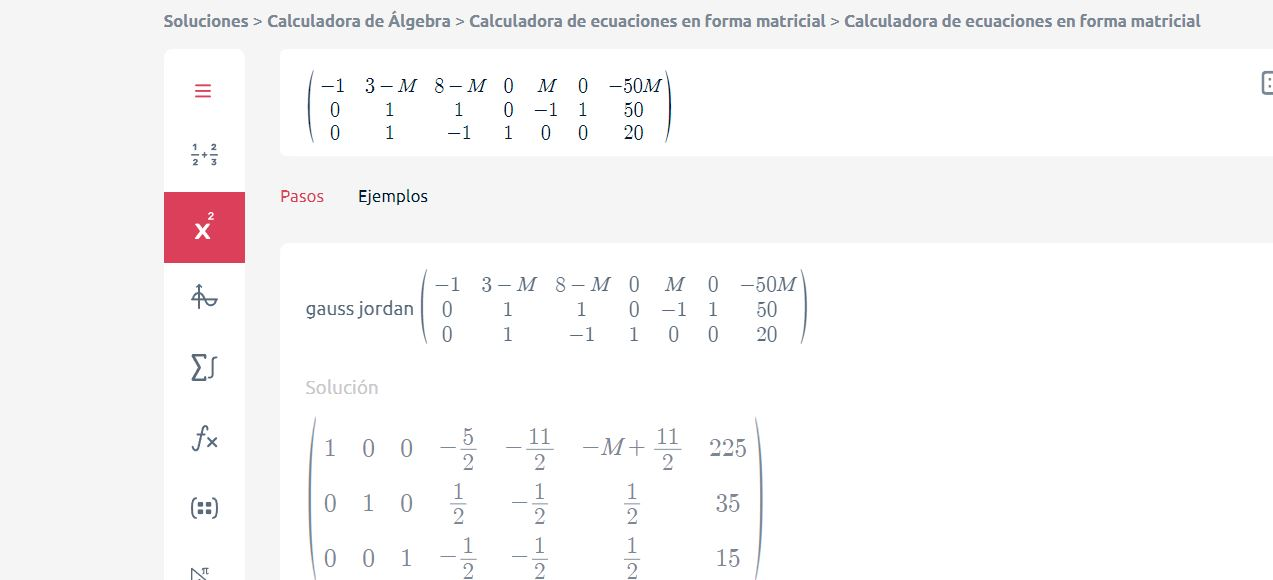

X= 35 y Y= 15

Ahora, por el lado facil utilizando una calculador gratuita online llamada emathhelp.net obtenemos el mismo resultado: https://www.emathhelp.net/es/calculators/linear-programming/simplex-method-calculator/?z=3*x%2B8*y&c=x+%2B+y+%3E%3D+50%3B+x+-+y+%3C%3D+20%3B+x+%3E%3D+0%3B+y+%3E%3D+0.&m=m

X= 35 y Y = 15, además esta ultima herramienta nos da los valores de las demás variables K, G Y W= 0, lo que se podría analizar como que el proceso se esta llevando a cabo de la forma mas optima posible.

Ahora, como también se solicitó, lo resolvere por medio de programació python cvxpy:

In [6]:
import cvxpy as cp

#creamos las variables
x = cp.Variable()
y = cp.Variable()

#creamos las restricciones
constraints = [x + y >= 50,
               x - y <= 20]

#creamos la funcion objetivo
obj = cp.Minimize((3*x)+ (8*y))

prob = cp.Problem(obj, constraints)
prob.solve()  # nos retorna los valores optimos
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

status: optimal
optimal value 224.99999999893296
optimal var 34.999999999824524 14.999999999932424


Como se puede ver, nos arroja aproximaciones al mismo valor de X= 35 y Y=15.